
<a href="http://www.cosmostat.org/" target="_blank"><img align="left" width="300" src="http://www.cosmostat.org/wp-content/uploads/2017/07/CosmoStat-Logo_WhiteBK-e1499155861666.png" alt="CosmoStat Logo"></a>
<br>
<br      >
<br>
<br>

# Numpy Intro 
---


> Author: <a href="http://www.cosmostat.org/people/santiago-casas" target="_blank" style="text-decoration:none; color: #F08080">Santiago Casas</a>  
> Email: <a href="mailto:santiago.casas@cea.fr" style="text-decoration:none; color: #F08080">santiago.casas@cea.fr</a>  
> Year: 2020  
> Version: 1.0

---

So far we have seen how to use and define *lists, dictionaries, functions* and some other *pythonic* tools. However, in scientific research one often needs more very efficient algorithms specialized libraries for working with arrays, math functions, databases and graphics.

**Numpy** is much more efficient in handling arrays, due to the way it handles memory.
Python lists are pointers to a block of pointers, each of one being a full python object.
Numpy arrays contain a pointer to a contiguous array of data, of a fixed type. Therefore, less flexible in its elements but way faster in reading and writing.

<img src=https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png width='600'>

## Contents
---


1. [Numpy Intro](#Numpy-Intro)
1. [Import Numpy](#Import-Numpy)
1. [Array functionality](#Array-functionality)
    1. [Arrays from lists](#Arrays-from-lists)
    1. [Creating arrays without using lists](#Creating-arrays-without-using-lists)
    1. [Multi-dimensional arrays](#Multi-dimensional-arrays)
    1. [Slicing and accessing elements](#Slicing-and-accessing-elements)
    1. [Slicing: View vs. Copy](#Slicing:-View-vs.-Copy)
1. [Numpy integrated universal functions](#Numpy-integrated-universal-functions)
    1. [Speed test: Loops and lists vs. Numpy and uFuncs](#Speed-test:-Loops-and-lists-vs.-Numpy-and-uFuncs)
1. [Advanced array manipulation](#Advanced-array-manipulation)
    1. [Broadcasting](#Broadcasting)
    1. [Fancy indexing and masking](#Fancy-indexing-and-masking)
1. [Exercises](#Exercises)

# Import Numpy

In [1]:
import numpy

It is more convenient to assign the numpy package contents to an alias to avoid having longer expressions.

In [2]:
import numpy as np

In this example the **`as`** statement assigns the numpy package contents to the object `np`.

---

# Small Recap: Lists and Dictionaries

## Lists

This is a python list

In [3]:
alist = [1,2,3,4,5,6]

List can be accessed using indices starting from 0, where the last index is specified by -1.

In [4]:
alist[0]

1

In [5]:
alist[2]

3

### Question 

What is the output of `alist[-1]` ? 

In [6]:
#Uncomment to see the answer
#alist[-1] 

Lists also can be **sliced** using semicolons, `start:end:step` . It returns the list from start up to end, without including the endpoint. If nothing is specified in the `start` or `end` it means it's the first and last element per default.

In [7]:
alist[1:4]

[2, 3, 4]

Endpoint:

In [8]:
alist[4]

5

In [9]:
#Take the first two elements of the list
alist[:2]

[1, 2]

In [10]:
#Take the last two elements of the list
alist[-2:]

[5, 6]

In [11]:
#Which is the same as: 
alist[-2:None]

[5, 6]

In [12]:
print(alist[2:])
#Omitting the number after the semicolon is equivalent to indicating the list size:
alist[2:6] ==  alist[2:]

[3, 4, 5, 6]


True

In [13]:
#The argument after the second semicolon, indicates steps.
#Take every second element from start to finish
alist[::2]

[1, 3, 5]

In [14]:
#Which is the same as:
print(alist[0:-1:2])

[1, 3, 5]


In [15]:
#Or:
print(alist[None:-1:2])

[1, 3, 5]


In [16]:
#Reverse the list
alist[::-1]

[6, 5, 4, 3, 2, 1]

The logic there is: Take elements from 0 to -1 in steps of -1 (therefore reversing the array).

Let's create a larger list using list comprehension:

In [17]:
blist = [bb for bb in range(1,20)]

In [18]:
blist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

And now let's use slicing with steps of 5, from start to end:

In [19]:
blist[0::5]

[1, 6, 11, 16]

### Question 

Which of the following statements is True:

1. `blist[::5] == blist[0::5]` 

2. `blist[:] == blist[0:-1]`

2. `blist[::5] == blist[0:-1:5]` 

In [20]:
#Uncomment to see the answer
#print(blist[::5] == blist[0::5])
#print(blist[:] == blist[0:-1])
#print(blist[::5] == blist[0:-1:5])

Lists can contain not only numbers but also strings and other objects

In [21]:
my_list = [1, 'a', True, [1,2], 5, 'b', False, range(4)] 

Anyway, they can be sliced and their elements be accessed normally

In [22]:
my_list[2:5]

[True, [1, 2], 5]

In [23]:
my_list[6]==True

False

Remember that python is a **dynamically-typed language**

In [24]:
str(1.0)

'1.0'

In [25]:
print(bool(1), bool(0))

True False


In [26]:
def sqr(x):
    return x**2

In [27]:
c_list=[1.0, True, sqr]

### Question

What is the output of `c_list[2](2)` ?

In [28]:
#Uncomment to see the answer

#c_list[2](2)

We will see that this is precisely what makes lists very slow. That's where **numpy** comes to the rescue.

##  Dictionaries

Dictionaries are like lists, but instead of being accessed by indices, they are accessed by keys.

In [29]:
a_dict = {'a':1, 'b':2, 'c':3}

In [30]:
a_dict['b']

2

The dictionary can also be created by doing:

In [31]:
a_keys = ['a','b','c']
a_vals = [1,2,3]
a_dict = dict(zip(a_keys, a_vals))

And you can print the whole dictionary 

In [32]:
print(a_dict)

{'a': 1, 'b': 2, 'c': 3}


Lists cannot be accessed by indices. It returns KeyError.

In [33]:
try: 
    a_dict[-1]
except KeyError:
    print("This can't be done")
    pass

This can't be done


You can see the keys of the dictionary by doing:

In [34]:
a_dict.keys()

dict_keys(['a', 'b', 'c'])

And its values by doing:

In [35]:
a_dict.values()

dict_values([1, 2, 3])

In [36]:
print(a_dict)

{'a': 1, 'b': 2, 'c': 3}


You can also reverse the dictionary values and keys by doing :

In [37]:
inverse_dict = dict(zip(a_dict.values(), a_dict.keys()))

### Question

What is the output of `inverse_dict[2]` ?

In [38]:
#Uncomment to see the answer
#inverse_dict[2]

Dictionaries are very useful for storing data, however they can't be sliced or easily indexed and they don't allow mathematical operations on them.

This is where **pandas** comes to the rescue.

# Array functionality

## Arrays from lists


The most essential numpy object is the numpy array (<a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html" target="_blank">numpy.ndarray</a>).

In [39]:
# a is a list
a = [1, 2, 3, 4]
print('a is', type(a))

# b is a numpy array
b = np.array(a)
print('b is', type(b))

a is <class 'list'>
b is <class 'numpy.ndarray'>


Accessing and printing a single entry works exactly the same.

In [40]:
print('first element of a is', a[0])
print('first element of b is', b[0])

first element of a is 1
first element of b is 1


In [41]:
print('last element of a is', a[-1])
print('last element of b is', b[-1])

last element of a is 4
last element of b is 4


However, their printed forms are slightly different.

In [42]:
print('list: ', a)
print('np array: ',b)

list:  [1, 2, 3, 4]
np array:  [1 2 3 4]


Moreover, while lists can contain different object types

In [43]:
a = [1, 1.0, 'a', True]
print(a)

[1, 1.0, 'a', True]


**numpy** arrays are of a single type only, which is one of the reasons why they are so efficient.

---




For example, in this case it will convert all entries to strings (upcasting)

In [44]:
np.array(a)

array(['1', '1.0', 'a', 'True'], dtype='<U32')

Or in this case, all entries to floats

In [45]:
np.array([1, 2.5, 23, 100.0, np.pi])

array([  1.        ,   2.5       ,  23.        , 100.        ,
         3.14159265])

One can also specify the type directly with the optional argument **dtype** and the entries will be converted to the specified type.

In [46]:
np.array([1, 2.5, 23, 100.0, np.pi], dtype='int32')

array([  1,   2,  23, 100,   3], dtype=int32)

Did you notice the $\pi$ constant was transformed into an integer in the list above?

How do we get other constants, such as $\pi$ above? Here you can find a list of available (<a href="https://www.numpy.org/devdocs/reference/constants.html" target="_blank">constants</a>). Another one useful in science is

In [47]:
#Euler's constant
np.e

2.718281828459045

### Question

What's the output of `np.array([1, 0], dtype=bool)`

In [48]:
#Uncomment to see the answer
#np.array([1, 0], dtype=bool)

## Creating arrays without using lists

Sometimes it is useful to create a numpy array in a fast way from scratch. Numpy offers several neat methods.

### Zeros and Ones

In [49]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# Create a length-5 floating-point array filled with ones
np.ones(5, dtype=float)

array([1., 1., 1., 1., 1.])

In [51]:
# Create a length-7 floating-point array filled with fives  #first argument size, second argument fill value
np.full(7, 5, dtype=float)

array([5., 5., 5., 5., 5., 5., 5.])

> **Question:** What are the elements of `np.full(3, np.e, dtype=int64)` ?

In [52]:
# Answer Puzzle 1:
#uncomment to see the answer:
#print(np.full(3, np.e, dtype=int))

### A range and linspace

One of the most useful arrays for everyday scientific work is to create arrays that contain evenly-spaced numbers within an interval. 

In [53]:
#A range of ints up to 3.0 with default step 1.0
print(np.arange(3))


# A range from start to stop, with a given step
print(np.arange(5.0, 405., 50))

[0 1 2]
[  5.  55. 105. 155. 205. 255. 305. 355.]


> **<font color='red'>NOTE:</font>** Note that with **`arange`** the endpoint is not included !

Remember to check the documentation within the Jupyter notebook running on a cell: **`?np.arange`**

If one needs to specify the number of samples and also include the endpoint, then linspace is the right tool. It even contains an optional argument `endpoint`, which defaults to `True`.

In [54]:
#Four floats evenly spaced in the interval 0. to 3. The third argument is the number of elements/samples
np.linspace(0.,3.,4)

array([0., 1., 2., 3.])

In [55]:
#With endpoint=False, we get the same behavior as `np.arange`
np.linspace(0.,3.,3, endpoint=False)

array([0., 1., 2.])

> **<font color='green'>NOTE:</font>** Notice the difference between printing and just evaluating !

In [56]:
#default number of samples is 50
np.linspace(0,100)

array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])

Another important array for scientists is a **logarithmically-spaced** interval. The default logarithm is base 10, but that can be changed with the `base` optional argument. The initial and final values of the interval have to be specified in their logarithms.

In [57]:
# A log10-spaced interval from 10^-2 to 10^3 of size 5.
np.logspace(-2, 3, 5)

array([1.00000000e-02, 1.77827941e-01, 3.16227766e+00, 5.62341325e+01,
       1.00000000e+03])

Applying a $\log_{10}$ on the whole array shows that it is indeed log-spaced.

In [58]:
np.log10(np.logspace(-2, 3, 5))

array([-2.  , -0.75,  0.5 ,  1.75,  3.  ])

> **Notice** how we are using `numpy` internal functions, called uFuncs to calculate properties on the entire array. We will explain that better a bit later.

## Multi-dimensional arrays

Arrays can also be multi-dimensional. And their shape can be specified at creation.

In [59]:
#2-dimensional array of size 3x5
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [60]:
#2-dimensional array of size 3x5, filled with 7
npf = np.full((3,5), 7)
print(npf)

[[7 7 7 7 7]
 [7 7 7 7 7]
 [7 7 7 7 7]]


Notice how we get a numpy array of ints, since we specified an integer.

Creating the ***identity*** matrix of size 5

In [61]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

`np.eye` is a generalization of the identity, with arguments `numpy.eye(N, M=None, k=0, dtype=<class 'float'>, order='C')`. `N` is the number of rows of the array, `M` defaults to `N` and is the number of columns, while `k` shifts the diagonal by a positive or negative integer with respect to the main diagonal. The other arguments can be looked up in the documentation.

In [62]:
#rectangular matrix
np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [63]:
#shifted diagonal
np.eye(5, k=2)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Sometimes one just needs an array with garbage numbers which is to be filled later on. `np.empty` does the job:

In [64]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty((3,6))

array([[6.94218458e-310, 6.94218458e-310, 4.68372898e-310,
        4.68372898e-310, 0.00000000e+000, 0.00000000e+000],
       [            nan, 0.00000000e+000, 7.79499192e-071,
        0.00000000e+000, 4.44659081e-323, 6.94218231e-310],
       [4.68372852e-310,             nan, 0.00000000e+000,
                    nan, 0.00000000e+000, 8.37174761e-144]])

Very useful in science is the creation of arrays with **random numbers** following a given distribution. Check the extensive documentation of (<a href="https://www.numpy.org/devdocs/reference/random/index.html?highlight=random#module-numpy.random" target="_blank">numpy.random</a>) for much more information on all the available methods.

In [65]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[ 0.75718734, -0.73238937, -1.15862759],
       [-1.33878984,  0.65899577,  1.02337592],
       [-1.09580903,  1.43665082, -2.89583484]])

In [66]:
# Create a 6x6 array of uniformly distributed
# random integers between 0 and 10
rand_mat = np.random.randint(0, 10, (6, 6))
print(rand_mat[:,0])

[5 2 1 4 9 0]


One can create a random set of points following a Gaussian distribution with a given covariance.

In [67]:
mean = [0, 0]
cov = [[1, 0.5],
       [0.5, 3]]
X = np.random.multivariate_normal(mean, cov, 1000)
X.shape

(1000, 2)

Gaussian distribution:
  $$ \mathcal{N}(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp(-(x-\mu)^2/ 2 \sigma^2)$$
  * Here $\mu$ is the mean and $\sigma^2$ the standard deviation.

Other two realizations of the same Gaussian

In [68]:
X2 = np.random.multivariate_normal(mean, cov, 1000)
X3 = np.random.multivariate_normal(mean, cov, 1000)

> **<font color='red'>NOTE:</font>** We will see more details about matplotlib in the next session!

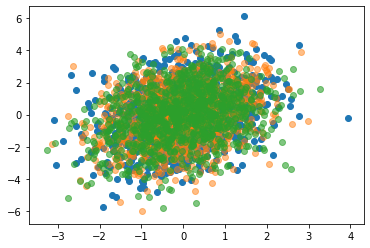

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.5);
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.6);

### Reshape and Flatten

To construct multi-dimensional arrays, one can also reshape 1-dimensional arrays, using the useful method `reshape(i,j)`. The arguments indicate the rows and the columns of the new array.

Let's reshape an old array above that had size 36:

In [70]:
rand_mat.size

36

In [71]:
# Reshape a 2-dim array
rand_mat.reshape(9,4)   #notice that the product of the dimensions should be 36

array([[5, 0, 5, 3],
       [6, 0, 2, 2],
       [5, 5, 7, 3],
       [1, 1, 1, 0],
       [1, 8, 4, 8],
       [5, 8, 6, 0],
       [9, 6, 8, 2],
       [3, 0, 0, 9],
       [4, 3, 8, 0]])

In [72]:
## This will give an error:
### uncomment to see the error
#rand_mat.reshape(9,3) 

If we don't want to do the complicated operation of multiplying or dividing to get the array dimensions, we can use `-1`. 
If one of the `reshape` arguments is `-1` then the size of the other axis is inferred from the array.

In [73]:
rand_mat.reshape(3,-1)

array([[5, 0, 5, 3, 6, 0, 2, 2, 5, 5, 7, 3],
       [1, 1, 1, 0, 1, 8, 4, 8, 5, 8, 6, 0],
       [9, 6, 8, 2, 3, 0, 0, 9, 4, 3, 8, 0]])

> **Puzzle:** The attribute `shape` returns the shape of a numpy array in the form of a tuple. What is the output of `rand_mat.reshape(2,-1).shape[1]` ?

In [74]:
#Answer Puzzle 3:
#Uncomment to see the answer
#print('the answer is: ', rand_mat.reshape(2,-1).shape[1])

And for scientific purposes, the ***transpose*** is a very important attribute

In [75]:
(rand_mat.reshape(9,4)).T

array([[5, 6, 5, 1, 1, 5, 9, 3, 4],
       [0, 0, 5, 1, 8, 8, 6, 0, 3],
       [5, 2, 7, 1, 4, 6, 8, 0, 8],
       [3, 2, 3, 0, 8, 0, 2, 9, 0]])

In [76]:
((rand_mat.reshape(9,4)).T)[0,1]==((rand_mat.reshape(9,4)))[1,0]

True

Other available attributes are:

In [77]:
print("Number of dimensions, ndim: ", rand_mat.ndim)
print("Array shape:", rand_mat.shape)
print("Array size: ", rand_mat.size)

Number of dimensions, ndim:  2
Array shape: (6, 6)
Array size:  36


## Slicing and accessing elements

As you might now, slicing works for lists, using the `:` operator

### Slicing Numpy arrays

> Slicing in visual form:

<img src='https://scipy-lectures.org/_images/numpy_indexing.png' width='600'>

Let's repeat the array of the picture

In [78]:
array_5  = np.arange(0,6)
array_5

array([0, 1, 2, 3, 4, 5])

In [79]:
array_55 = np.array([array_5 + (10*ii) for ii in array_5])

In [80]:
print(array_55)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In 2 dimensions, the first index (or slice object) corresponds to rows and the second index (or slice object) to columns.

 <font color=' red'>first column, fourth and fifth elements:</font>

In [81]:
array_55[0, 3:5]  

array([3, 4])

 <font color=' green'> Lower right 2x2 corner: </font>

In [82]:
array_55[4:, 4:]  

array([[44, 45],
       [54, 55]])

 <font color=' blue'> Third column: </font>

In [83]:
array_55[:, 2]  

array([ 2, 12, 22, 32, 42, 52])

 <font color=' purple'> Third and fifth column, every second element: </font>

In [84]:
array_55[2::2, ::2]  

array([[20, 22, 24],
       [40, 42, 44]])

Later we will see that with fancy indexing, this can be written in a clearer way.

> **Puzzle:** Obtain the array `[3, 23, 43]` by using slicing.

In [85]:
#Answer hint to Puzzle 5
## ::, 2, :, 3

Other slicing examples:

In [86]:
#All rows, every other column
array_55[:,::2]

array([[ 0,  2,  4],
       [10, 12, 14],
       [20, 22, 24],
       [30, 32, 34],
       [40, 42, 44],
       [50, 52, 54]])

In [87]:
#Fourth row, all columns
array_55[3,:]

array([30, 31, 32, 33, 34, 35])

> **<font color='red'>NOTE:</font>** Slicing performs a view of the element and not a copy !

## Slicing: View vs. Copy

In [88]:
array2d = array_55
print(array2d)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [89]:
#Obtain shape
array2d.shape

(6, 6)

Slices can be saved separately as objects and then applied. Notice that the use of `None` is very useful to replace the empty string between colons.

In [90]:
slice_rows = slice(1, array2d.shape[0]-1, None)
slice_cols = slice(1, array2d.shape[1]-1)

In [91]:
#Obtain central array, removing the borders of size one from the array

array2d_center=array2d[slice_rows, slice_cols]
print(array2d_center)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]


In [92]:
#Now if we modify this subarray, we'll see that the original array is changed! 

array2d_center[0,0]=1001.5

In [93]:
print(array2d_center)

[[1001   12   13   14]
 [  21   22   23   24]
 [  31   32   33   34]
 [  41   42   43   44]]


In [94]:

print(array2d)

[[   0    1    2    3    4    5]
 [  10 1001   12   13   14   15]
 [  20   21   22   23   24   25]
 [  30   31   32   33   34   35]
 [  40   41   42   43   44   45]
 [  50   51   52   53   54   55]]


Also the original array, before the slicing operation was changed!!

In [95]:
print(array_55)

[[   0    1    2    3    4    5]
 [  10 1001   12   13   14   15]
 [  20   21   22   23   24   25]
 [  30   31   32   33   34   35]
 [  40   41   42   43   44   45]
 [  50   51   52   53   54   55]]


> **<font color='red'>NOTE:</font>** Notice not only the big array was changed, but also how numpy converted automatically the new number to `int`, to match the other variable types !

From the `Python Data Science Handbook`: This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

However, if we don't want this behavior, because it can be confusing and introduce possible bugs (believe me, it has happened to me), we can use the `copy` method.

In [96]:
sub_array = array2d[slice_rows, slice_cols].copy()
print(sub_array)

[[1001   12   13   14]
 [  21   22   23   24]
 [  31   32   33   34]
 [  41   42   43   44]]


In [97]:
#Modify an element of the subarray
sub_array[1,1] = 999
print(sub_array)

[[1001   12   13   14]
 [  21  999   23   24]
 [  31   32   33   34]
 [  41   42   43   44]]


Now the large array is not touched:

In [98]:
print(array2d)

[[   0    1    2    3    4    5]
 [  10 1001   12   13   14   15]
 [  20   21   22   23   24   25]
 [  30   31   32   33   34   35]
 [  40   41   42   43   44   45]
 [  50   51   52   53   54   55]]


**Useful trick:** Many elements of the large array can be modified through the small array using slicing.

In [99]:
array2d_center[:2,:2]=[[1e6,1e6],[1e6,1e6]]

In [100]:
print(array2d_center)

[[1000000 1000000      13      14]
 [1000000 1000000      23      24]
 [     31      32      33      34]
 [     41      42      43      44]]


In [101]:
print(array2d)

[[      0       1       2       3       4       5]
 [     10 1000000 1000000      13      14      15]
 [     20 1000000 1000000      23      24      25]
 [     30      31      32      33      34      35]
 [     40      41      42      43      44      45]
 [     50      51      52      53      54      55]]


> How to do copying correctly:

Create array that you don't want to modify:

In [102]:
array_55 = np.array([array_5 + (10*ii) for ii in array_5])

Copy array to another one that you want to modify using slicing or assignement.

In [103]:
array2d = np.copy(array_55)

In [104]:
array2d

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

Fill with zeros every second column:

In [105]:
array2d[:, ::2] = np.zeros(array2d[:, ::2].shape)  ## Notice the use of np.zeros and shape.

In [106]:
array2d

array([[ 0,  1,  0,  3,  0,  5],
       [ 0, 11,  0, 13,  0, 15],
       [ 0, 21,  0, 23,  0, 25],
       [ 0, 31,  0, 33,  0, 35],
       [ 0, 41,  0, 43,  0, 45],
       [ 0, 51,  0, 53,  0, 55]])

The original array that we ***don't*** want to changed, is unchanged.

In [107]:
array_55

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

> **Puzzle 6:** Change the last two rows of array2d by zeros.

In [108]:
#Answer hint Puzzle 6:
## -2  = 0
# print(array2d)

> The fact that also simple assignements work, is thanks to broadcasting, which we will leave for a later tutorial.

# Numpy integrated universal functions

The power of **numpy** lies in its speed and efficiency in performing operations on large arrays.

Functions that operate on the entire array are called ***universal functions*** or for short, uFuncs.

## Arithmetic

In [109]:
x = np.arange(5)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)   # modulo

x     = [0 1 2 3 4]
x + 5 = [5 6 7 8 9]
x - 5 = [-5 -4 -3 -2 -1]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x // 2 = [0 0 1 1 2]
-x     =  [ 0 -1 -2 -3 -4]
x ** 2 =  [ 0  1  4  9 16]
x % 2  =  [0 1 0 1 0]


These operators are actually wrappers to the method form:

In [110]:
np.add(x,5)

array([5, 6, 7, 8, 9])

In [111]:
np.floor_divide(x,2)

array([0, 0, 1, 1, 2])

More functions like this can be found in the documentation of the <a href="https://www.numpy.org/devdocs/reference/ufuncs.html#available-ufuncs" target="_blank">uFuncs</a> .

## Trigonometric functions

Numpy can compute mathematical functions very efficiently over a large array. They are computed to withon machine precision, therefore tiny values instead of exact zeros can appear.

In [112]:
# An array of 3000 elements between 0 and Pi.
theta = np.linspace(0, np.pi, 3000)
print("theta      = ", theta[0])
print("sin(theta) = ", np.sin(theta)[-1])
print("cos(theta) = ", np.cos(theta)[0])
print("tan(theta) = ", np.tan(theta)[-1])

theta      =  0.0
sin(theta) =  1.2246467991473532e-16
cos(theta) =  1.0
tan(theta) =  -1.2246467991473532e-16


Numpy also offers mathematical functions like `exp` and `log` and versions that are more accurate for tiny numbers, like **`expm1`** and **`log1p`**. 

In [113]:
# For tiny x values, log(1+x) and exp(x)-1 are very very close to x.
x = np.array([0., 0.01, 1e-12, 1e-14])
print("     x          =", x)

print("std: exp(x) - 1 =", np.exp(x)-1.0)   #not exactly x for very small x
print("     exp(x) - 1 =", np.expm1(x))
print("std: log(1 + x) =", np.log(1.0+x))
print("     log(1 + x) =", np.log1p(x))

     x          = [0.e+00 1.e-02 1.e-12 1.e-14]
std: exp(x) - 1 = [0.00000000e+00 1.00501671e-02 1.00008890e-12 9.99200722e-15]
     exp(x) - 1 = [0.00000000e+00 1.00501671e-02 1.00000000e-12 1.00000000e-14]
std: log(1 + x) = [0.00000000e+00 9.95033085e-03 1.00008890e-12 9.99200722e-15]
     log(1 + x) = [0.00000000e+00 9.95033085e-03 1.00000000e-12 1.00000000e-14]


There are tons of functionalities more, but this is just a rough overview. In the documentation and many other excellent tutorials and books, such as the 
    <a href="https://jakevdp.github.io/PythonDataScienceHandbook/"  target="_blank">Python Data Science Handbook</a>  one can find much more on these topics.

## Speed test: Loops and lists vs. Numpy and uFuncs

In a standard programming language, like C, we would have to define the following non-pythonic function in order to compute the reciprocal of a list

In [114]:
def compute_reciprocals(values):
    output = []
    for i in range(len(values)):
        output.append(1.0 / values[i])
    return output

In [115]:
a_list = np.random.randint(1,10,10000000).tolist()  #notice the tolist method here
print(a_list[0])

6


Computing the reciprocal will be slow, since each element of the python list is a data structure object.

In [116]:
%%timeit -n1 -r1 -o
b_list = compute_reciprocals(a_list)
#print(b_list[0])

945 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 945 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [117]:
best_list = _.best

In [118]:
best_list

0.9445594870048808

> `%%time` and `%%timeit` are part of these magic functions that we will see explained in the jupyter session.

In [119]:
a_array = np.random.randint(1,10,10000000)

In Numpy we don't even need to define a function, we just calculate 1.0/list.

In [120]:
%%timeit -n1 -r1 -o
b_array = 1.0 / a_array
#print(b_array)

39.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 39.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [121]:
best_numpy = _.best

In [122]:
best_numpy

0.03950264999002684

In [123]:
## Ratio of best timing speeds
print("Numpy is {:.2f} times faster than lists and looops".format(best_list/best_numpy))

Numpy is 23.91 times faster than lists and looops


# Advanced array manipulation

## Broadcasting

One of the most powerful features of `numpy` is, as we just saw, the fact that one can operate directly on entire arrays, element by element, without the need of cumbersome loops.

***Broadcasting*** is a way of applying uFuncs to arrays of different sizes. In the simplest case, addition, multiplication and so on, but actually it can be done with any uFunc that receives 2 arguments.

In [124]:
# Add a scalar to an array
s=5
ones = np.ones((3,5))
sixes = ones + s

In [125]:
print(sixes)

[[6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6.]]


In [126]:
# Add two arrays
ones + sixes

array([[7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.]])

> **<font color='red'>NOTE:</font>** Lists do not behave like that, when added, they concatenate.

In [127]:
#Convert numpy arrays to lists
ones.tolist() + sixes.tolist()

[[1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [6.0, 6.0, 6.0, 6.0, 6.0],
 [6.0, 6.0, 6.0, 6.0, 6.0],
 [6.0, 6.0, 6.0, 6.0, 6.0]]


## Fancy indexing and masking

Finally, let's look at a couple of important tricks and methods available for numpy arrays, which make a scientist's life much easier.

### Obtaining several entries of an array at once

Fancy indexing is simply the property of accessing arrays not only with slicing, but with integers or booleans.

In [128]:
a100 = np.arange(100)

Let's say we wanted to obtain entries 1, 21, 41 and 61 and put them in an array. In other languages one would do something like:

In [129]:
[a100[1], a100[21], a100[41] , a100[61]]

[1, 21, 41, 61]

**Option 1:** In python we could use slicing:

In [130]:
a100[1:62:20]

array([ 1, 21, 41, 61])

**Option 2:** We could use a list of integers (fancy indexing):

In [131]:
#accessing entries with integers
a100[[1,21,41,61]]

array([ 1, 21, 41, 61])

**Option 3:** Or we could define a list and extract only those that match using booleans (masking)

In [132]:
extract = [1,21,41,61]
mask = np.array([aa in extract for aa in a100])
print(mask)

[False  True False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [133]:
a100[mask]

array([ 1, 21, 41, 61])

Fancy indexing is very powerful, because it can be used for assigning:

In [134]:
a100[[10,20,30]] = -1000

In [135]:
a100

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9, -1000,    11,    12,    13,    14,    15,    16,    17,
          18,    19, -1000,    21,    22,    23,    24,    25,    26,
          27,    28,    29, -1000,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99])

And it can also change the shape of the original array, if it is indexed with an array of integers of different shape:

In [136]:
idx = np.array([[20,21],[29,30]])

In [137]:
a100[idx]

array([[-1000,    21],
       [   29, -1000]])

### Masking and comparisons

Numpy allows to do comparisons directly on arrays

In [138]:
## Obtain booleans for values smaller than 10
a100 < 0

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

And then use those comparisons as masks:

In [139]:
# Get the values
a100[a100 < 0]

array([-1000, -1000, -1000])

In [140]:
#Get all odd values
a100[a100 %2 != 0]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

> **<font color='green'>NOTE:</font>** Note how powerful this masking and comparison is compared to handling simple python lists (even more compared to other languages).

Other functions like `np.sum` or `np.count_nonzero` can be used with these logical operators (True==1, False==0):

In [141]:
np.sum([True, True, False])

2

In [142]:
np.count_nonzero([0,1,2,3,0,4,0,5])

5

In [143]:
np.count_nonzero([False,True,False])

1

> **Puzzle 8:** Use the array a100 to sum all entries from 90 to 99.

In [144]:
#Answer Hint Puzzle 8:
# np.sum a100[mask]

One can also combine comparisons with logical operators:

|Operator|uFunc|
|------|---------------|
|&|`np.bitwise_and`|
|^|`np.bitwise_xor`|
|||`np.bitwise_or`|
|~|`np.bitwise_not`|

In [145]:
x = np.arange(10)
print("x:", x)
(x > 4) & (x <9)

x: [0 1 2 3 4 5 6 7 8 9]


array([False, False, False, False, False,  True,  True,  True,  True,
       False])

Notice how easy it is to filter entries by comparison

In [146]:
x[(x > 4) & (x <9)]

array([5, 6, 7, 8])

Number of integers larger than 80, which are odd:

In [147]:
np.sum((a100 > 80) & ~(a100%2 == 0))

10

## Exercise 1:

> Using broadcasting and in max. 2 lines of code, construct a multiplication table of the numbers from 1 to 10, i.e., where for each column corresponding to 1,2,3,..., the rows correspond to their integer multiples. For 1 to 3, it looks like this:

---

|1|2|3|
|--|--|--|
|2|4|6|
|3|6|9|

> Then, using masking, remove all multiples of 3, in one line of code. So that the result (in this case for 3x3) looks like this:

|1|2|0|
|--|--|--|
|2|4|0|
|0|0|0|

> Finally, compute the sum over each column and write it into a list:

                                                      [3,6,0]


> **[Next Chapter: Pandas](./Pandas.ipynb)**